# Explore here

It's recommended to use this notebook for exploration purposes.

In [1]:
#Import Libraries
import pandas as pd
import requests
import time
from bs4 import BeautifulSoup as bs

In [18]:
#Catch URL
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# User agent header configuration to simulate a web browser
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
}

# Make the request to the website with the defined header
tesla = requests.get(url, headers=headers)

In [19]:
#Html parsing
html = tesla.text
soup = BeautifulSoup(html, 'html.parser')
tables = soup.find_all('table')
print(tables)

[<table class="historical_data_table table">
<thead>
<tr>
<th colspan="2" style="text-align:center">Tesla Annual Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:center">2022</td>
<td style="text-align:center">$81,462</td>
</tr>
<tr>
<td style="text-align:center">2021</td>
<td style="text-align:center">$53,823</td>
</tr>
<tr>
<td style="text-align:center">2020</td>
<td style="text-align:center">$31,536</td>
</tr>
<tr>
<td style="text-align:center">2019</td>
<td style="text-align:center">$24,578</td>
</tr>
<tr>
<td style="text-align:center">2018</td>
<td style="text-align:center">$21,461</td>
</tr>
<tr>
<td style="text-align:center">2017</td>
<td style="text-align:center">$11,759</td>
</tr>
<tr>
<td style="text-align:center">2016</td>
<td style="text-align:center">$7,000</td>
</tr>
<tr>
<td style="text-align:center">2015</td>
<td style="text-align:center">$4,046</td>
</tr>
<tr>
<td style="text-align:center">2014</

In [20]:
#Reveal Quarterly Revenue
quarterly_revenue_table = None
for table in tables:
        if "Quarterly Revenue" in table.get_text():
            quarterly_revenue_table = table

In [21]:
#Data Extraction from HTML Table
data = []
for row in quarterly_revenue_table.find_all('tr')[1:]:
            cells = row.find_all(['th', 'td'])
            date = cells[0].get_text()
            revenue = cells[1].get_text()
            data.append([date, revenue])

In [22]:
#Create DataFrame
df = pd.DataFrame(data, columns=["Date", "Revenue"])
print(df)

          Date  Revenue
0   2023-09-30  $23,350
1   2023-06-30  $24,927
2   2023-03-31  $23,329
3   2022-12-31  $24,318
4   2022-09-30  $21,454
5   2022-06-30  $16,934
6   2022-03-31  $18,756
7   2021-12-31  $17,719
8   2021-09-30  $13,757
9   2021-06-30  $11,958
10  2021-03-31  $10,389
11  2020-12-31  $10,744
12  2020-09-30   $8,771
13  2020-06-30   $6,036
14  2020-03-31   $5,985
15  2019-12-31   $7,384
16  2019-09-30   $6,303
17  2019-06-30   $6,350
18  2019-03-31   $4,541
19  2018-12-31   $7,226
20  2018-09-30   $6,824
21  2018-06-30   $4,002
22  2018-03-31   $3,409
23  2017-12-31   $3,288
24  2017-09-30   $2,985
25  2017-06-30   $2,790
26  2017-03-31   $2,696
27  2016-12-31   $2,285
28  2016-09-30   $2,298
29  2016-06-30   $1,270
30  2016-03-31   $1,147
31  2015-12-31   $1,214
32  2015-09-30     $937
33  2015-06-30     $955
34  2015-03-31     $940
35  2014-12-31     $957
36  2014-09-30     $852
37  2014-06-30     $769
38  2014-03-31     $621
39  2013-12-31     $615
40  2013-09-30  

In [23]:
#Data Cleaning and Formatting: Replace empty, $, and , 
df = df.replace('', None)
df['Revenue'] = df['Revenue'].str.replace('[\$,]', "", regex=True)
df = df.dropna()
print(df)

          Date Revenue
0   2023-09-30   23350
1   2023-06-30   24927
2   2023-03-31   23329
3   2022-12-31   24318
4   2022-09-30   21454
5   2022-06-30   16934
6   2022-03-31   18756
7   2021-12-31   17719
8   2021-09-30   13757
9   2021-06-30   11958
10  2021-03-31   10389
11  2020-12-31   10744
12  2020-09-30    8771
13  2020-06-30    6036
14  2020-03-31    5985
15  2019-12-31    7384
16  2019-09-30    6303
17  2019-06-30    6350
18  2019-03-31    4541
19  2018-12-31    7226
20  2018-09-30    6824
21  2018-06-30    4002
22  2018-03-31    3409
23  2017-12-31    3288
24  2017-09-30    2985
25  2017-06-30    2790
26  2017-03-31    2696
27  2016-12-31    2285
28  2016-09-30    2298
29  2016-06-30    1270
30  2016-03-31    1147
31  2015-12-31    1214
32  2015-09-30     937
33  2015-06-30     955
34  2015-03-31     940
35  2014-12-31     957
36  2014-09-30     852
37  2014-06-30     769
38  2014-03-31     621
39  2013-12-31     615
40  2013-09-30     431
41  2013-06-30     405
42  2013-03

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipykernel_1853/620799545.py:3: SyntaxWarning: invalid escape sequence '\$'
  df['Revenue'] = df['Revenue'].str.replace('[\$,]', "", regex=True)


In [12]:
import sqlite3
#Connection to SQL DB
# Create a connection to the database or open it if it already exists
connection = sqlite3.connect("tesla_revenue.db")

# Create the "revenue" table if it doesn't exist
cursor = connection.cursor()
cursor.execute("""
    CREATE TABLE IF NOT EXISTS revenue (
        id INTEGER PRIMARY KEY,
        date INTEGER,
        revenue REAL
    )
""")

# Insert values into the table
data_to_insert = [
    (1, '2023-01-01', 1000000.00),
    (2, '2023-02-01', 1500000.00),
    (3, '2023-03-01', 1200000.00),
    # Add more rows as needed
]

cursor.executemany("INSERT INTO revenue (id, date, revenue) VALUES (?, ?, ?)", data_to_insert)

# Store (commit) the changes in the database
connection.commit()

# Close the connection to the database
connection.close()

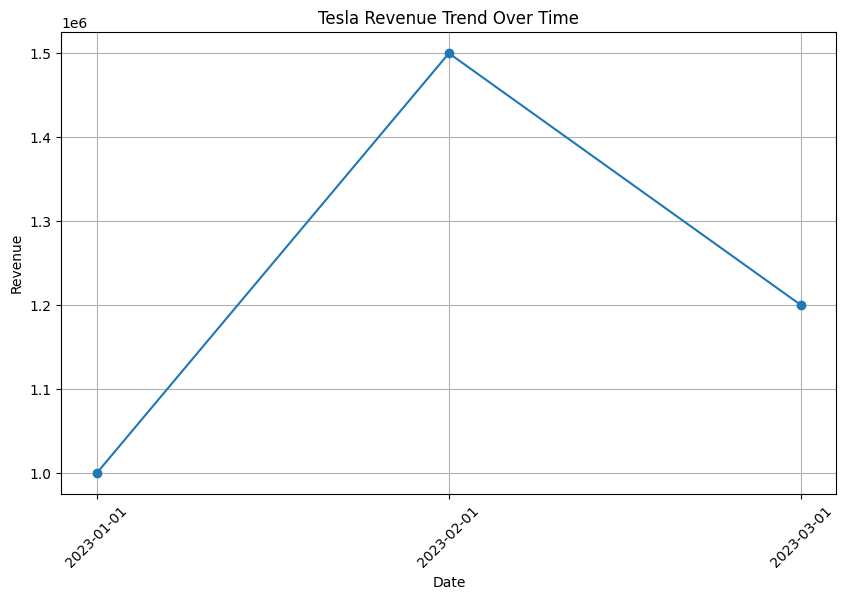

In [24]:
# Data Visualization
# Lines plot
import sqlite3
import matplotlib.pyplot as plt

# Connect to the database
connection = sqlite3.connect("tesla_revenue.db")
cursor = connection.cursor()

# Query revenue data sorted by date
cursor.execute("SELECT date, revenue FROM revenue ORDER BY date")
results = cursor.fetchall()
dates, revenues = zip(*results)

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(dates, revenues, marker='o', linestyle='-')
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.title("Tesla Revenue Trend Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Close the connection to the database
connection.close()

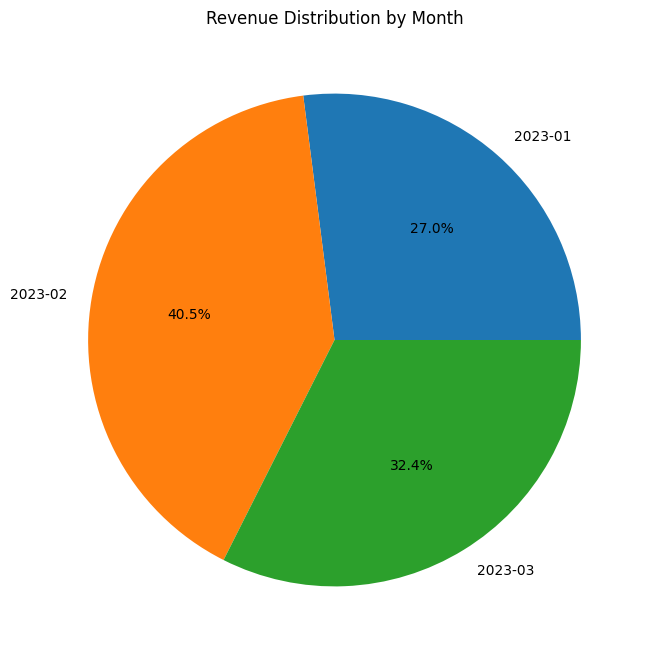

In [29]:
# Pie chart
import sqlite3
import matplotlib.pyplot as plt

# Connect to the database
connection = sqlite3.connect("tesla_revenue.db")
cursor = connection.cursor()

# Query total revenue by month
cursor.execute("SELECT strftime('%Y-%m', date) AS month, SUM(revenue) FROM revenue GROUP BY month")
results = cursor.fetchall()
months, monthly_revenues = zip(*results)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(monthly_revenues, labels=months, autopct='%1.1f%%')
plt.title("Revenue Distribution by Month")
plt.show()

# Close the connection to the database
connection.close()

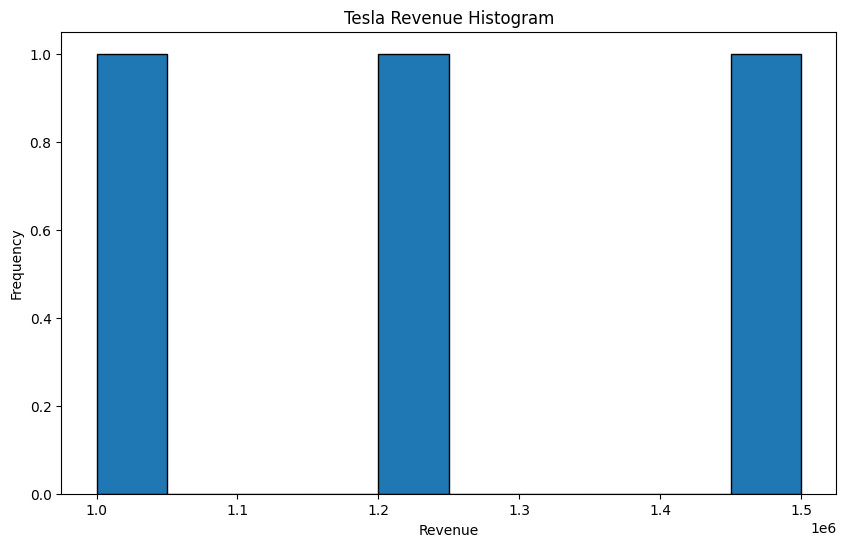

In [30]:
#Histogram chart
# Connect to the database
connection = sqlite3.connect("tesla_revenue.db")
cursor = connection.cursor()

# Query revenue data
cursor.execute("SELECT revenue FROM revenue")
results = cursor.fetchall()
revenues = [result[0] for result in results]

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(revenues, bins=10, edgecolor='black')
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.title("Tesla Revenue Histogram")
plt.show()

# Close the connection to the database
connection.close()